In [3]:
import sys
configDir =  '/home/thibaud/repos/anaconda/rakuten/notebook'
if configDir not in sys.path:
    sys.path.append(configDir)

import config

print(sys.path)

['/home/thibaud/repos/anaconda/rakuten/notebook', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python39.zip', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/lib-dynload', '', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages', '/home/thibaud/repos/anaconda/rakuten', '/home/thibaud/repos/anaconda/rakuten/src']


/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.2.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.2.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning:

/home/thibaud/repos/anaconda/rakuten/data/clean/df_test_index.csv
                                       precision    recall  f1-score   support

                 10 - Livres occasion       0.53      0.52      0.52       623
1140 - Figurines et objet pop culture       0.78      0.79      0.79       534
                1160 - Cartes de jeux       0.91      0.96      0.93       791
     1180 - Figurines et jeux de rôle       0.81      0.56      0.66       153
                1280 - Jouets enfants       0.72      0.66      0.69       974
       1281 - Jeux de société enfants       0.70      0.55      0.62       414
               1300 - Jeux techniques       0.87      0.96      0.91      1009
              1301 - Vêtements enfant       0.97      0.96      0.97       161
                         1302 - Pêche       0.83      0.81      0.82       498
                  1320 - Puériculture       0.86      0.81      0.83       648
                      1560 - Mobilier       0.82      0.84      

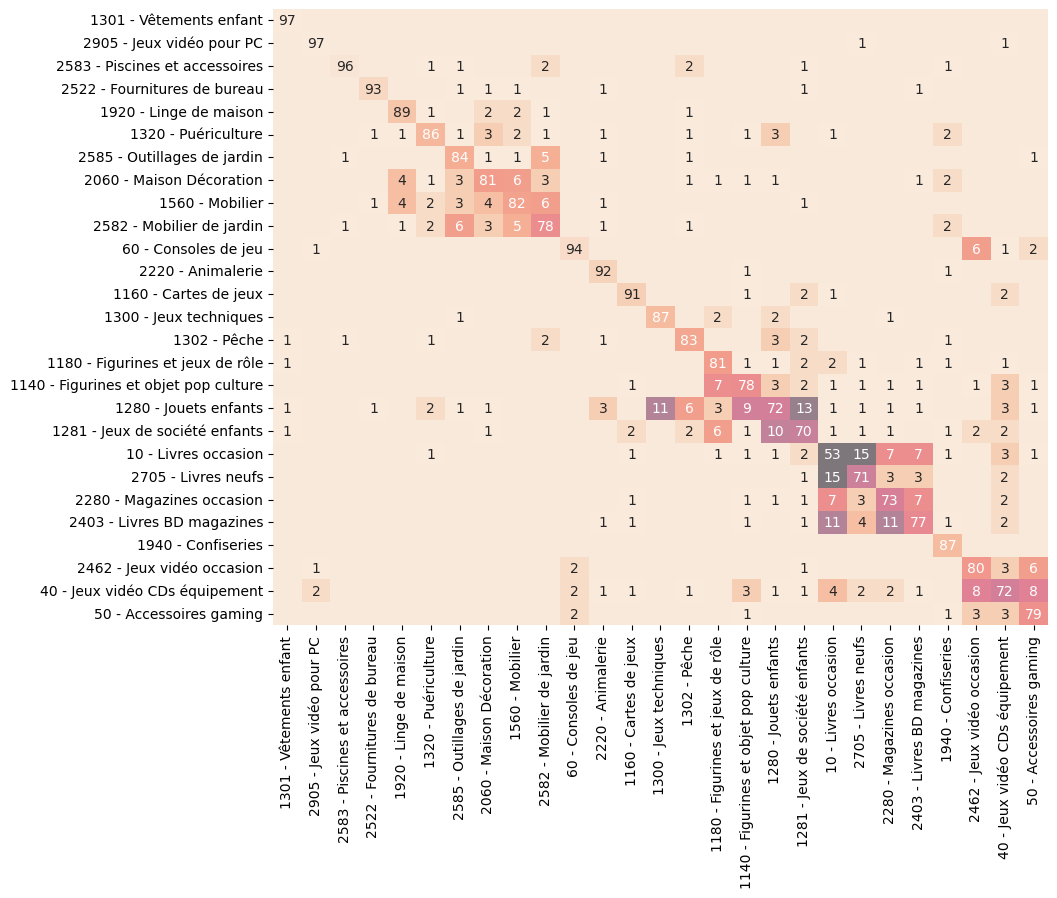

In [7]:

from importlib import reload
import src.utils.results as results

reload(results)
from src.utils.results import ResultsManager
res = ResultsManager(config)
res.add_result_file('../results/results_benchmark_sklearn.csv', 'text')
res.add_result_file('../results/results_benchmark_bert.csv', 'bert')
res.add_result_file('../results/results_benchmark_img.csv', 'img')

# res.plot_f1_scores(filter_package=['bert','text'])
# res.plot_f1_scores_by_prdtype(filter_package=['bert','text'])

# res.df_results[res.df_results.package=='img'].head()
# text/camembert-base-ccnet
# image/vit_b16
# text/LinearSVC_tfidf
res.plot_classification_report('text/LinearSVC_tfidf')
# print(res.get_model_paths())


In [79]:
/home/thibaud/repos/anaconda/rakuten/data/clean/le_classes .npy

(30, 19)

In [13]:
from importlib import reload
import plotly.graph_objs as go
import numpy as np
import src.utils.plot as uplot

reload(uplot)
scores = fusion[['model_path', 'score_test', 'package', 'classifier', 'vectorization']]

# display(scores)


scores.loc[:, 'vectorizer'] = scores.apply(lambda row: row.classifier if pd.isna(row.vectorization) else row.vectorization, axis=1)
scores=scores.groupby(['model_path', 'package', 'classifier', 'vectorizer']).max('score_test').reset_index()
scores = scores[scores.package != 'img']
sorted_scores = scores.sort_values(by='score_test', ascending=False)

# Sort 'scores' by 'score_test' in descending order
sorted_scores = scores.sort_values('score_test', ascending=False)

# Create custom categories order based on the sorted 'score_test'
custom_categories_order = sorted_scores['model_path'].tolist()


uplot.plot_bench_results(
    sorted_scores, 
    'model_path', 
    'score_test', 
    'model', 
    'f1 score', 
    color_column='vectorizer',
    title='Benchmark des f1 scores'
)




/tmp/ipykernel_1141312/2952430557.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<module 'matplotlib.pyplot' from '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [ ]:
from importlib import reload
import plotly.graph_objs as go
import numpy as np
import src.utils.plot as uplot

reload(uplot)
scores = fusion[['model_path', 'score_test', 'package', 'classifier', 'vectorization']]

# display(scores)


scores.loc[:, 'vectorizer'] = scores.apply(lambda row: row.classifier if pd.isna(row.vectorization) else row.vectorization, axis=1)
scores=scores.groupby(['model_path', 'package', 'classifier', 'vectorizer']).max('score_test').reset_index()
scores = scores[scores.package != 'img']
sorted_scores = scores.sort_values(by='score_test', ascending=False)

# Sort 'scores' by 'score_test' in descending order
sorted_scores = scores.sort_values('score_test', ascending=False)

# Create custom categories order based on the sorted 'score_test'
custom_categories_order = sorted_scores['model_path'].tolist()


uplot.plot_bench_results(
    sorted_scores, 
    'model_path', 
    'score_test', 
    'model', 
    'f1 score', 
    color_column='vectorizer',
    title='Benchmark des f1 scores'
)


